## Insurance Claims- Fraud Detection

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the data set
df=pd.read_csv('Automobile_Insurance_Fraud.csv')

In [3]:
#findinng out the total number ofrows and columns inn the data set
df.shape

(1000, 40)

There ae 1000 rows and 40 columns in the data set

In [4]:
# first few rows of the dataset
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


from the above few rows it is clear that the dta set has '?' in the variable 'Police Report Available'. It can be with other other variables too. It has to be checked and treated before going for EDA

In [5]:
#Finding out the informaton about the variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

It is clear from the above analysis that:
1. The variable '_c39' has all the Null values so it can be reduced.
2. There is a mix of string and numerical values in the data set that has to be treated.
3. There ae total 40 variaables including our target vnp.ariable 'Fraud Detection'

#### finding out the columns and total number of rows in those columns which are showing '?' 


In [6]:
blanks={}
for i in list (df.columns):
    if (df[i]).dtype == object:
        j=np.sum(df[i]=='?')
        blanks[i]=j
blanks=pd.DataFrame.from_dict(blanks,orient='index')
print(blanks)

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


There are 178 rows in 'collicion_type', 360 rows in property_damage and 343 in 'police_report_available' variables in the data set and all the three variables are of string type. Hence treating these values before going for EDA.

In [7]:
# replacing the '?' form Collison type with the mode, because mostly the collision happens in the same way 
#so replacing it by the highest frewuency of the collision_way
mode=df['collision_type'].mode()[0]
mode

'Rear Collision'

In [8]:
df['collision_type']=df['collision_type'].str.replace('?','Rear Collision')

In [9]:
# replacing '?' from the variable property_damage by 'No',
# beacuse there might be the possibility that if the damage is not being report than it may not happend 
df['property_damage']=df['property_damage'].str.replace('?','NO')

In [10]:
# replacing '?' from the variable police_report_available by NO,
# beacuse there might be the possibilty that police report is not available means it is not reported.
df['police_report_available']=df['police_report_available'].str.replace('?','NO')

Checking the data : Whether there are any '?' left in any variables or not.

In [11]:
print('unique report values:',df.police_report_available.unique())
print('unique collision type values:',df.collision_type.unique())
print('unique property demage values:',df.property_damage.unique())

unique report values: ['YES' 'NO']
unique collision type values: ['Side Collision' 'Rear Collision' 'Front Collision']
unique property demage values: ['YES' 'NO']


There are no '?' in the data set. again checking for null values.

In [12]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [13]:
# droping the '_c39' variable as it has all the null values.
df.drop('_c39', axis=1, inplace=True)

In [14]:
#Checking whether the column has been dropped.
df.shape

(1000, 39)

In [15]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#### Now the data set has 1000 rows and 39 columns including our target variable'fraud_reported'
### Moving ahead with EDA

#### plotting counter plots for categorical data. 

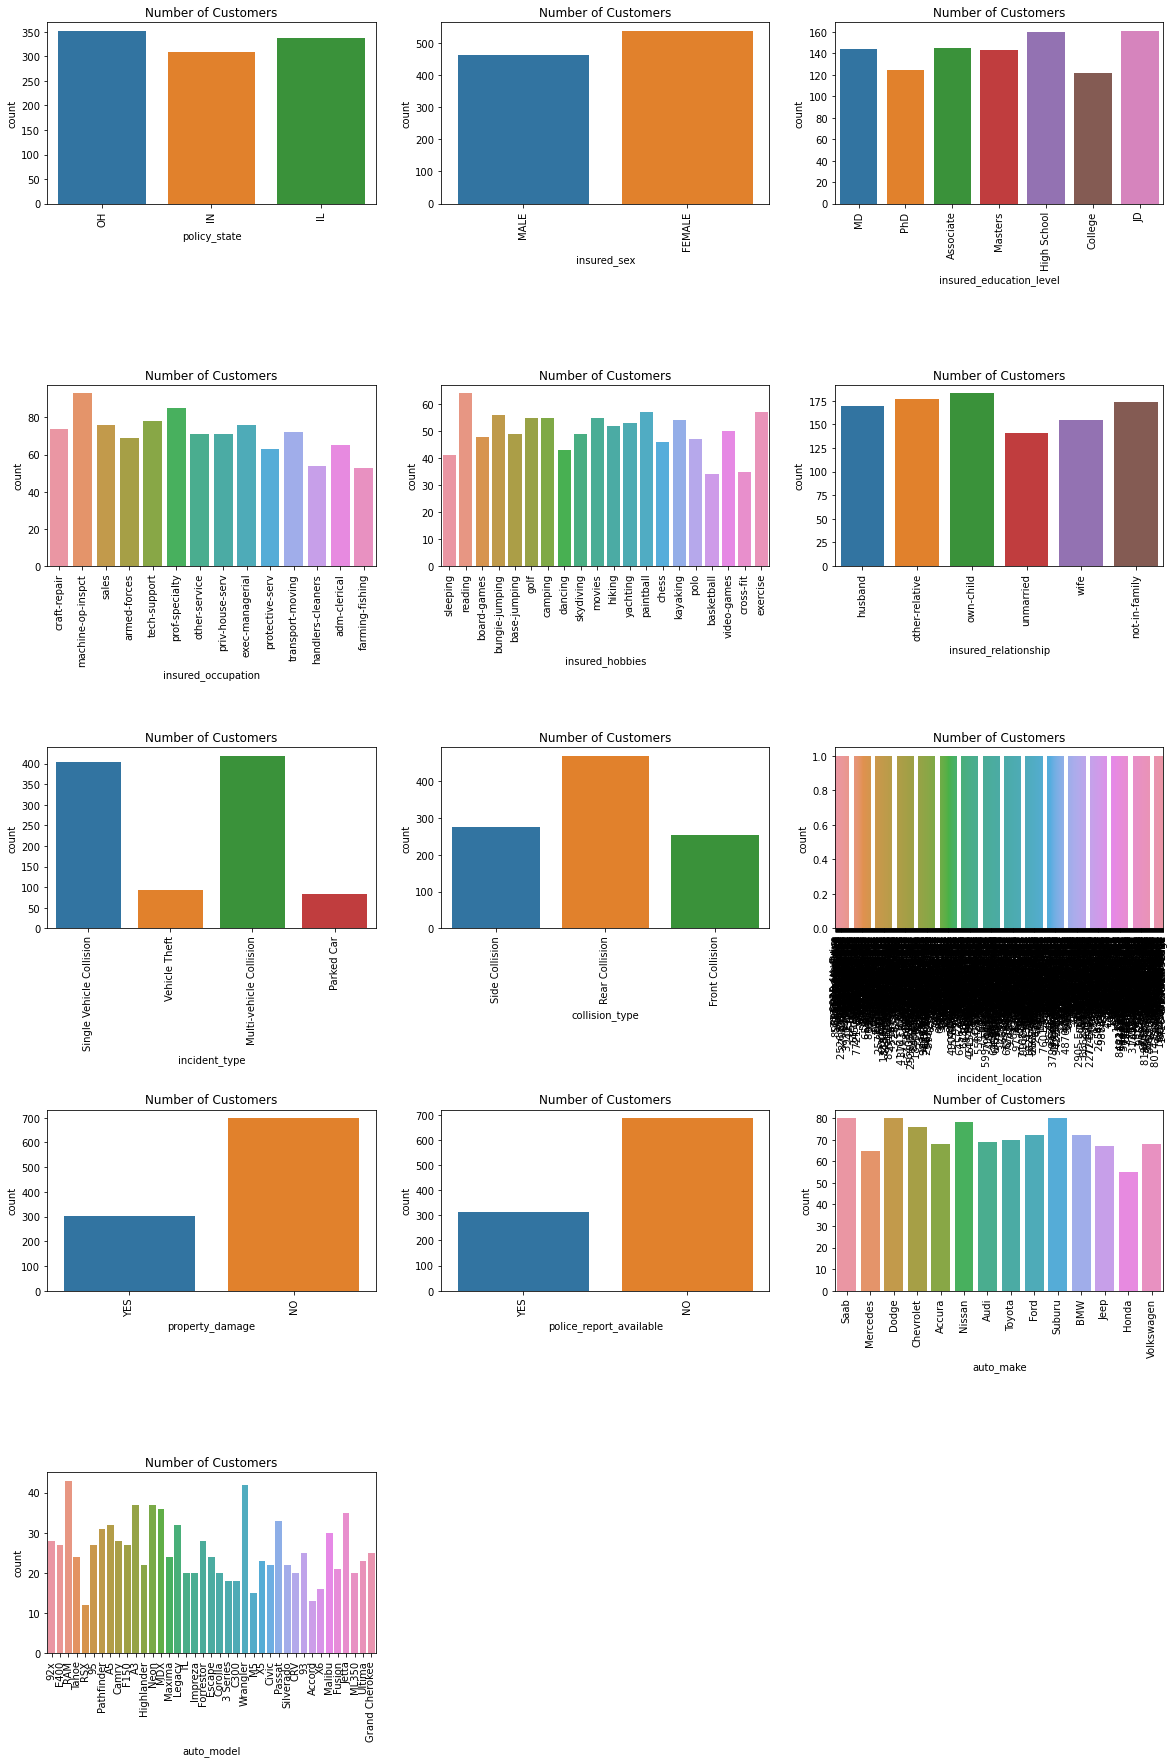

In [17]:
variables=['policy_state','insured_sex','insured_education_level','insured_occupation', 'insured_hobbies','insured_relationship','incident_type','collision_type','incident_location','property_damage','police_report_available','auto_make','auto_model']
fig=plt.subplots(figsize=(20,30))
for i, j in enumerate(variables):
    plt.subplot(5, 3, i+1)
    plt.subplots_adjust(hspace = 1)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title('Number of Customers')

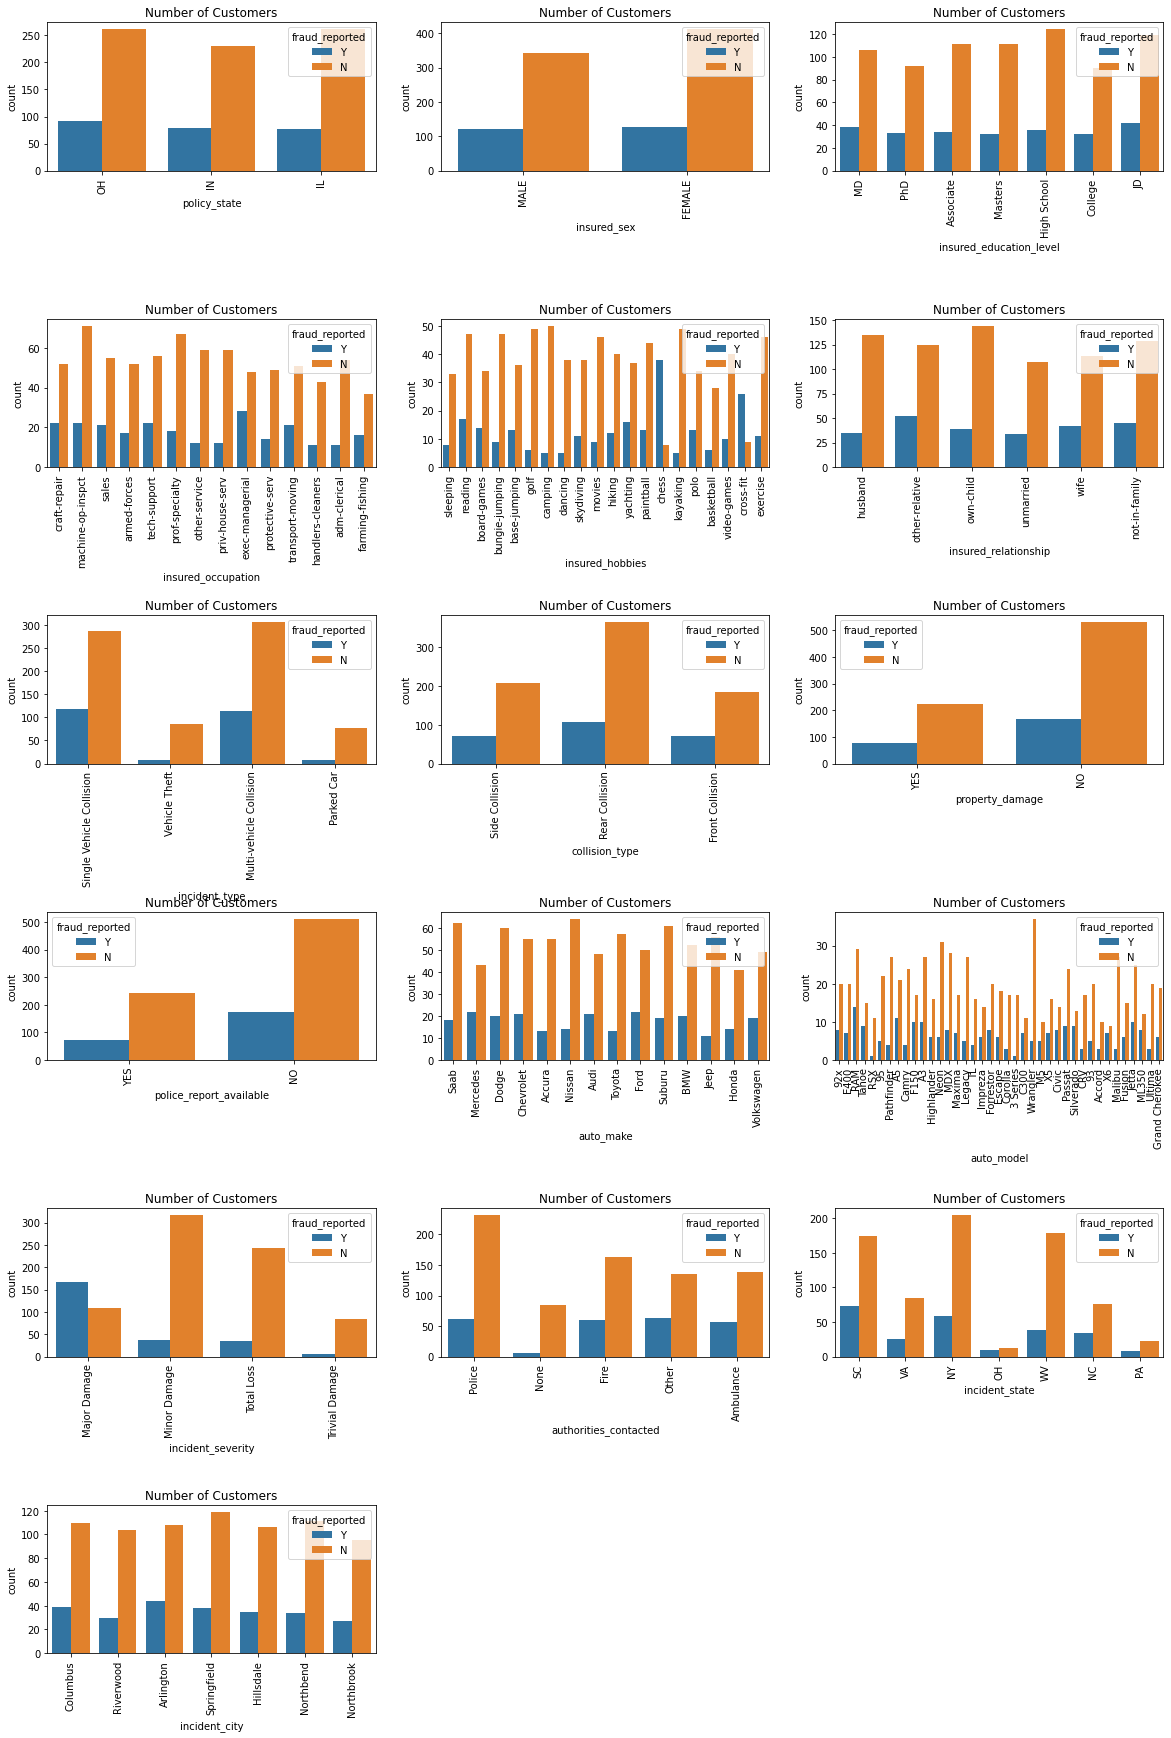

In [18]:
variables=['policy_state','insured_sex','insured_education_level','insured_occupation', 'insured_hobbies','insured_relationship','incident_type','collision_type','property_damage','police_report_available','auto_make','auto_model','incident_severity','authorities_contacted','incident_state','incident_city']
fig=plt.subplots(figsize=(20,30))
for i, j in enumerate(variables):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 1)
    sns.countplot(x=j,data = df, hue='fraud_reported')
    plt.xticks(rotation=90)
    plt.title('Number of Customers')

From the above analysis it is clear that:
1. Mosly the number customers lies with policy state as 'CH' followed  by 'IL' then by 'IN'.and same follows with the fraud and non-fraud cases.
2. Number of female customers are more as compare to males but the number of fraud cases are approximately equal in both the categories.
3. The higeest number of customer belongs to high school and JD category of eduacational qualification followed by MD, Associateand Masters. The lowest number of customers fall in the category of college and PhD. The most number of cases with fraud category lies with JD, MD and High School.
4. There are 14 categories in the insured_occuparion variable. In this hihgest number of cuatomers works in 'machine_op_inspect' followed by 'prof_speciality'.But the most number of fraud cases lied with 'exec-managerial' category.
5. The custommers are having reading as hoby are higher in numbers than any other hobby. But the number customers having hobbies as chess and cross-fit doing fraud is more than any other category.
6. The number of customers in the relationship categories lies more with 'own-child' followed by other_relatives and then with 'Husband' and 'not-in-family'. But the most number of fraud cases report in the category of 'other_relative' and 'not_in_family'.
7. Most of the customer lies with 'Multiple collision' and 'Single-Collision' categories than in any other category of incident_type. same sollowes with the number of fraud cases reported.
8. The maximum number of customers are having 'rear type collision' as well as the nuber of fraud cases report are highest in this category.
9. The number of customers with no reporting of prepoprty demage are more in numbers as well the number frud cases reporteed are more in this category.
10. The number of customers who did not reported to police are more in numbers as well as the number of fraud cases are more in this category.
11. In the variable incident location there are many different locations where the incidents happen.
12. No exceptional conclusion can be drawn from the variable 'auto make' at this  level, same is the case with 'auto model variable.

#### Plottig the dist plot of numerical data

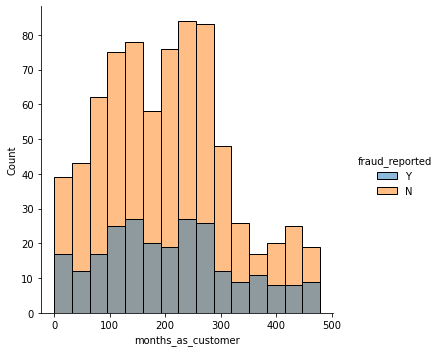

In [19]:
sns.displot(df, x='months_as_customer', hue="fraud_reported", kind="hist", fill=True)

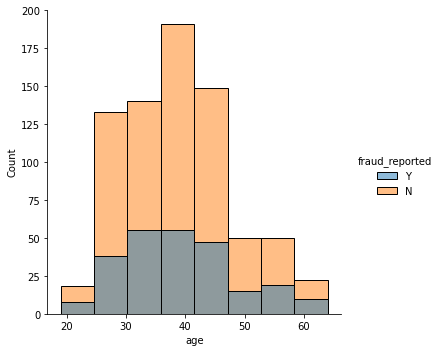

In [20]:
sns.displot(df, x='age', hue="fraud_reported", kind="hist", fill=True, bins=8)

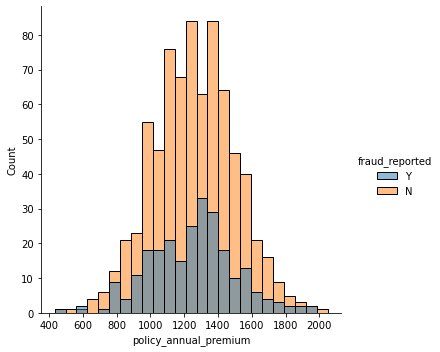

In [21]:
sns.displot(df, x='policy_annual_premium', hue='fraud_reported', kind='hist', fill=True)

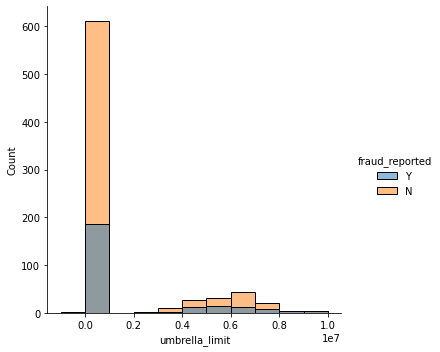

In [22]:
sns.displot(df, x='umbrella_limit', hue='fraud_reported', kind='hist', fill=True)

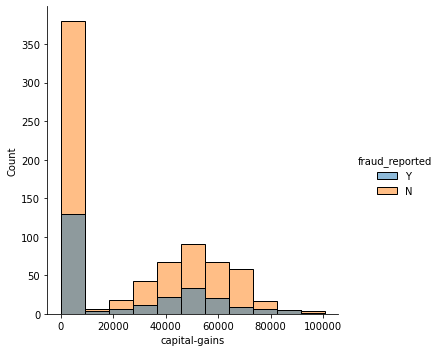

In [23]:
sns.displot(df, x='capital-gains', hue='fraud_reported', kind='hist', fill=True)

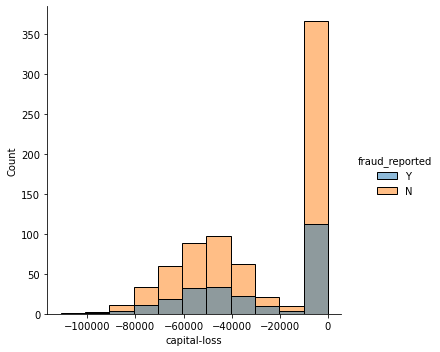

In [24]:
sns.displot(df, x='capital-loss', hue='fraud_reported', kind='hist', fill=True)

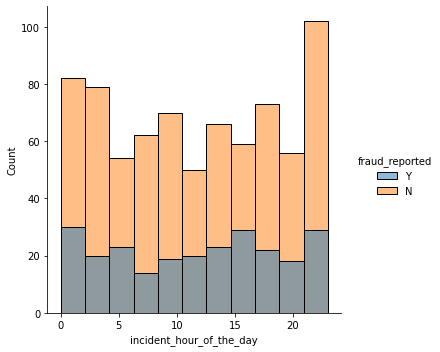

In [25]:
sns.displot(df, x='incident_hour_of_the_day', hue='fraud_reported', kind='hist', fill=True)

In [26]:
df.incident_hour_of_the_day.unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

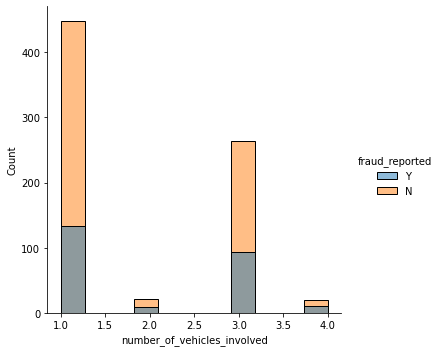

In [27]:
sns.displot(df, x='number_of_vehicles_involved', hue='fraud_reported', kind='hist', fill=True)

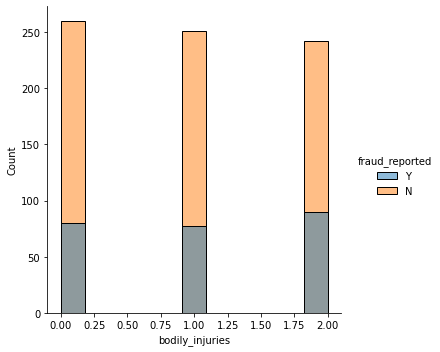

In [28]:
sns.displot(df, x='bodily_injuries', hue='fraud_reported', kind='hist', fill=True)

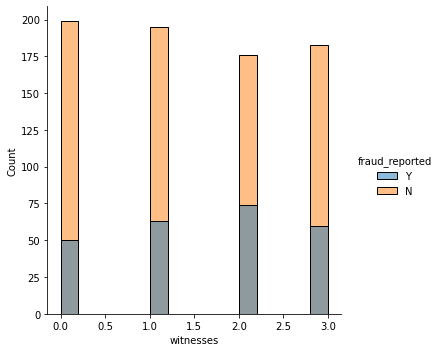

In [29]:
sns.displot(df, x='witnesses', hue='fraud_reported', kind='hist', fill=True)

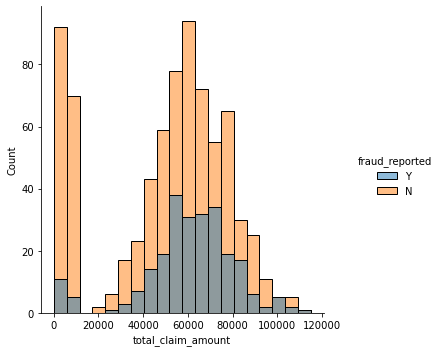

In [30]:
sns.displot(df, x='total_claim_amount', hue='fraud_reported', kind='hist', fill=True)

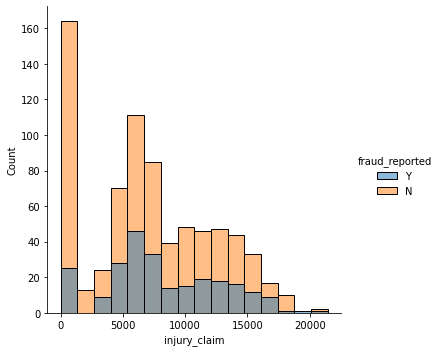

In [31]:
sns.displot(df, x='injury_claim', hue='fraud_reported', kind='hist', fill=True)

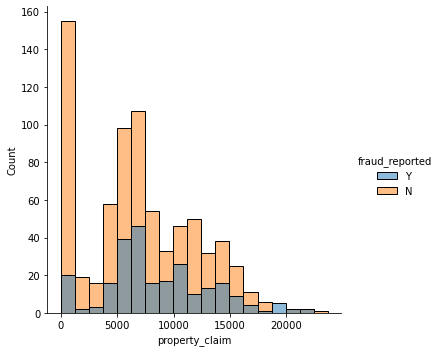

In [32]:
sns.displot(df, x='property_claim', hue='fraud_reported', kind='hist', fill=True)

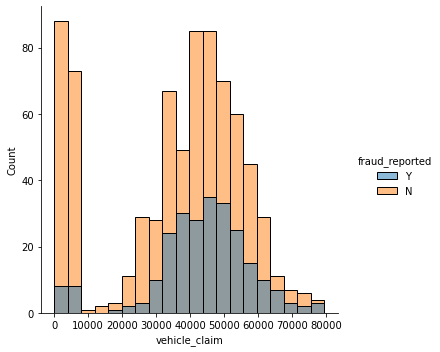

In [33]:
sns.displot(df, x='vehicle_claim', hue='fraud_reported', kind='hist', fill=True)

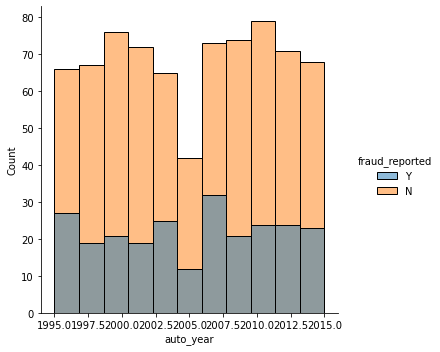

In [34]:
sns.displot(df, x='auto_year', hue='fraud_reported', kind='hist', fill=True)

From the above Histplots it is seen that:
1. Mostly the number customer lies between the range of 100 months old to 300 months old as well as most of the fraud cases are with this range only.
2. Most of the customers lies in the range of 30 to 50 years, as well as the number of fraud cases are more with this range of age.
3. Mostly the policy premium lies between the range of Rs.1000 to Rs.1600, as  well as modt of the fraud cases lies with this range also.The highest number of fraud cases lies with the premium category of Rs.1200 to Rs.1400 as premium.
4. Most of the customres are having 'Rs0' as umbrella limit as well as most of the fraudcases lies in this category.
5. Majorly the customers are with '0' as capital gain and as well as modt of the reported fraud cases are from this category only. But few considerable number of the frud reported cases also lies in the range of 40000 to 60000.
6. Mostly the customers having no capital loss but there are customers havong a considerable loss between 40000 to 60000 and the number of  fraus reported cases are also there in this range.
7. Almost incident has happened in the every hour of the day and the number of cases are almost similar but more number of the incidents happen between 20th to 24th hour than any other hour of the day as well as this lies with the number of fraud reported cases as well.
8. Either the number of vehicles involved are '1' or '3' there are very few cases with '2&4 number of involved vehicles. Hence the number of frud cases reported lies in the cateegory of '1&3' are  more.
9. Bodily injuries are almost similar in all the three categories.
10. There are more number of cases with no witness or either one witness but the highes number of fraud reported cases lies with the category of '3 witnesses'.
11. The number of cases with total calim amount as '0' and 60000 are highest in numbers than any other category.Butthe major number of fraud reported cases lies with the range of '50000 to 80000' as claim amount.
12. most number of injury claims lies with a very small amount (lessthan 1000),butthe highest number of fraud reported cases lies between the range of '4000 to 8000'.
13. Most number of property claim reported lies with a very small amount(less than 1000) but a large number of fraud reported cases lies in teh range of '5000 to 8000'.
14. Maximum number of vehicle claim cases lies between the range of '30000 to 60000' as well as maximum number fraud reported cases also lies in this category.
15. Almost similar numer of cases every year but the number of cases are less in the year 2007.


#### Plotting counplot of the target variable: fraud_reported

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

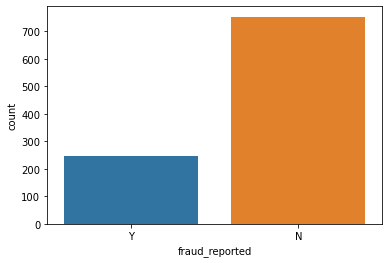

In [35]:
sns.countplot(x='fraud_reported', data=df)

From the above countplot it is clear that the number of non fraud cases are more than the number of fraud reported cases.
and the data set belongs to imbalaced data set categoty hence have to apply SMOTE.

months_as_customer                AxesSubplot(0.125,0.772143;0.227941x0.107857)
age                            AxesSubplot(0.398529,0.772143;0.227941x0.107857)
policy_number                  AxesSubplot(0.672059,0.772143;0.227941x0.107857)
policy_deductable                 AxesSubplot(0.125,0.642714;0.227941x0.107857)
policy_annual_premium          AxesSubplot(0.398529,0.642714;0.227941x0.107857)
umbrella_limit                 AxesSubplot(0.672059,0.642714;0.227941x0.107857)
insured_zip                       AxesSubplot(0.125,0.513286;0.227941x0.107857)
capital-gains                  AxesSubplot(0.398529,0.513286;0.227941x0.107857)
capital-loss                   AxesSubplot(0.672059,0.513286;0.227941x0.107857)
incident_hour_of_the_day          AxesSubplot(0.125,0.383857;0.227941x0.107857)
number_of_vehicles_involved    AxesSubplot(0.398529,0.383857;0.227941x0.107857)
bodily_injuries                AxesSubplot(0.672059,0.383857;0.227941x0.107857)
witnesses                         AxesSu

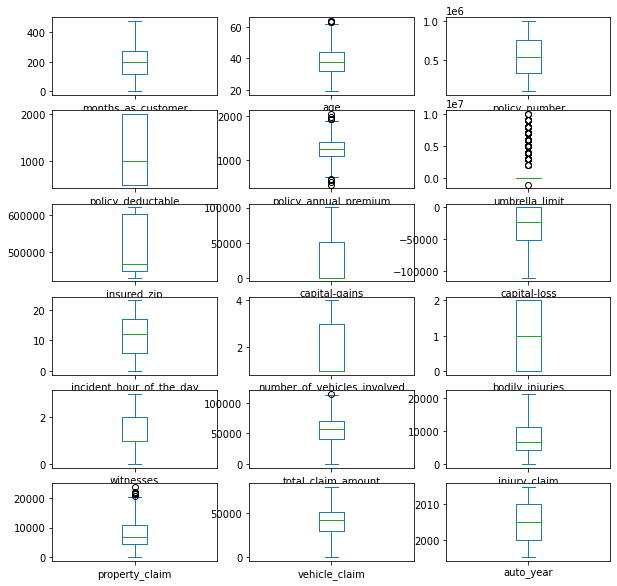

In [36]:
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(10,10))

There are outliers present in few of the variables but the outliers might be the real values (on the higher side but not of hat stature that it has to be treated.

<AxesSubplot:>

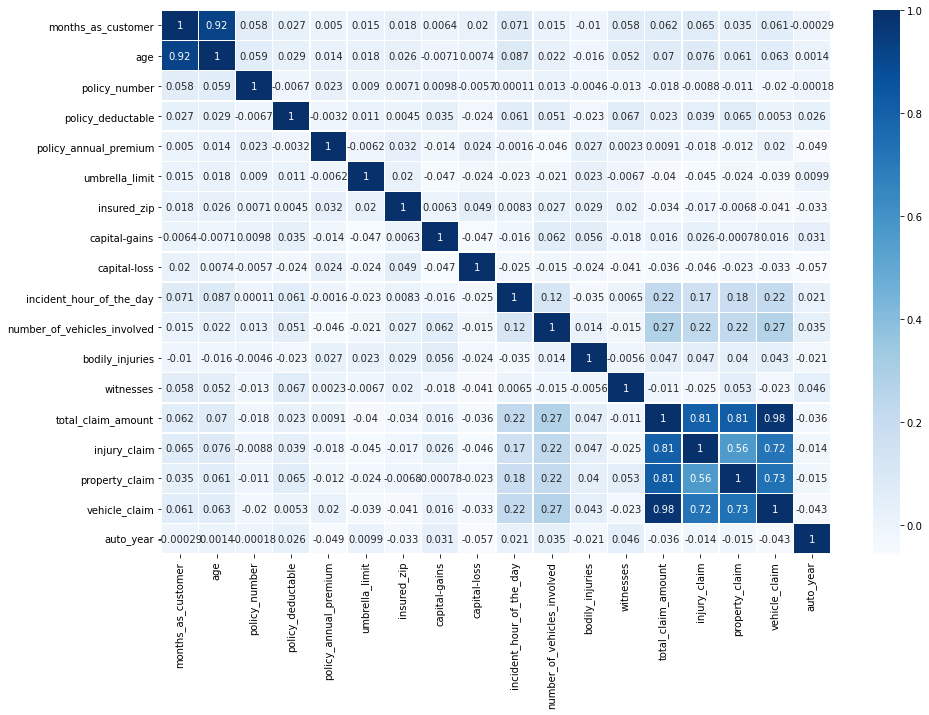

In [37]:
# finding out the correlation between the feature variables.
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, linewidths=.5)

There are two points in the heat map showing high correlation among the variable that might be because of:
1. age and months as customer both are correlated to with each other as the number of months customer associated with company increases, the age of the customer also increases.
2. All the claims are related with the total claim amount as they are the part of it.

In [38]:
# Changing the Target variable seperately as the categorical values 'Y' to be converted to '1' and 'N' to be converted to '0'
df['fraud_reported'].replace('Y', 1, inplace=True)
df['fraud_reported'].replace('N', 0, inplace=True)

#### Encoding the Categorical Data

In [39]:
# Dropping unncesssary columns--
df.drop(['policy_number','policy_bind_date','incident_date','incident_location'],axis=1,inplace=True)

In [40]:
df.drop(['insured_zip'],axis=1,inplace=True)

In [41]:
df.shape

(1000, 34)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation', 'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [44]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,1,0,6500,1300,650,4550,0,31,2009,0


### Splitting the dataset into feature variables and target variable.

In [45]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

### Applying SMOTE as the data set is a imbalanced set.

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [48]:
print('shape of trainx',trainx.shape)
print('shape of trainy',trainy.shape)

shape of trainx (1506, 33)
shape of trainy (1506,)


### Scaling the data

In [49]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
trainx=scale.fit_transform(trainx)

### Splitting the data set into trainning and testing part

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
xtrain,xtest,ytrain,ytest=train_test_split(trainx,trainy,test_size=.30,random_state=45)
print('xtrain shape:',xtrain.shape)
print('ytrain shape:',ytrain.shape)
print('xtest shape:',xtest.shape)
print('ytest shape:',ytest.shape)

xtrain shape: (1054, 33)
ytrain shape: (1054,)
xtest shape: (452, 33)
ytest shape: (452,)


### Fitting Models.

In [52]:
#importing required libraries
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [53]:
sv=SVC()
sv.fit(xtrain,ytrain)
t=sv.score(xtrain,ytrain)
print(round(t,2))

predsvc=sv.predict(xtest)
print('accuracy score:',accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

0.95
accuracy score: 0.8451327433628318
[[203  36]
 [ 34 179]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       239
           1       0.83      0.84      0.84       213

    accuracy                           0.85       452
   macro avg       0.84      0.84      0.84       452
weighted avg       0.85      0.85      0.85       452



In [54]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
d=dtc.score(xtrain,ytrain)
print(round(d,2))

preddtc=dtc.predict(xtest)
print(accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

1.0
0.7942477876106194
[[188  51]
 [ 42 171]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       239
           1       0.77      0.80      0.79       213

    accuracy                           0.79       452
   macro avg       0.79      0.79      0.79       452
weighted avg       0.80      0.79      0.79       452



In [55]:
# k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
k=knn.score(xtrain,ytrain)
print(round(k,2))

predknn=knn.predict(xtest)
print(accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

0.77
0.668141592920354
[[ 98 141]
 [  9 204]]
              precision    recall  f1-score   support

           0       0.92      0.41      0.57       239
           1       0.59      0.96      0.73       213

    accuracy                           0.67       452
   macro avg       0.75      0.68      0.65       452
weighted avg       0.76      0.67      0.64       452



In [56]:
# k=3
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
k=knn.score(xtrain,ytrain)
print(round(k,2))

predknn=knn.predict(xtest)
print(accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

0.83
0.6747787610619469
[[ 98 141]
 [  6 207]]
              precision    recall  f1-score   support

           0       0.94      0.41      0.57       239
           1       0.59      0.97      0.74       213

    accuracy                           0.67       452
   macro avg       0.77      0.69      0.65       452
weighted avg       0.78      0.67      0.65       452



In [57]:
# k=10
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(xtrain,ytrain)
k=knn.score(xtrain,ytrain)
print(round(k,2))

predknn=knn.predict(xtest)
print(accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

0.73
0.6836283185840708
[[113 126]
 [ 17 196]]
              precision    recall  f1-score   support

           0       0.87      0.47      0.61       239
           1       0.61      0.92      0.73       213

    accuracy                           0.68       452
   macro avg       0.74      0.70      0.67       452
weighted avg       0.75      0.68      0.67       452



In [58]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
l=lg.score(xtrain,ytrain)
print(round(l,2))

pred=lg.predict(xtest)
print("accuracy_score :",accuracy_score(pred,ytest))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.82
accuracy_score : 0.8053097345132744
[[192  47]
 [ 41 172]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       239
           1       0.79      0.81      0.80       213

    accuracy                           0.81       452
   macro avg       0.80      0.81      0.80       452
weighted avg       0.81      0.81      0.81       452



From all the fitted models the accuracy and f1 score of logistic regression are the best. The accuracy score is 80% and f1 score comes out to be 81%. 

### Using Ensemble Techniques to improve the model performance

In [59]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
r=rfc.score(xtrain,ytrain)
print(round(r,2))

predrfc=rfc.predict(xtest)
print(accuracy_score(ytest,predrfc))
print(confusion_matrix(ytest,predrfc))
print(classification_report(ytest,predrfc))

1.0
0.8628318584070797
[[202  37]
 [ 25 188]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       239
           1       0.84      0.88      0.86       213

    accuracy                           0.86       452
   macro avg       0.86      0.86      0.86       452
weighted avg       0.86      0.86      0.86       452



In [60]:
abc=AdaBoostClassifier()
abc.fit(xtrain,ytrain)
a=abc.score(xtrain,ytrain)
print(round(a,2))

predabc=abc.predict(xtest)
print(accuracy_score(ytest,predabc))
print(confusion_matrix(ytest,predabc))
print(classification_report(ytest,predabc))

0.89
0.8451327433628318
[[206  33]
 [ 37 176]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       239
           1       0.84      0.83      0.83       213

    accuracy                           0.85       452
   macro avg       0.84      0.84      0.84       452
weighted avg       0.85      0.85      0.85       452



From the above ensemble techniques the accuracy score of AdaBoost Classifier and random Forest Classifier both are the improved scores.
1. Randomm Forest Classifier gives the accuracy score of 86 % and the f1 score is 87%.
2. AdaBoost Classifier gives the accuracy score of 84.51% and the f1 score of 85%.

Hence goin for Cross-Validation of both the modles to check teh over fitting.

### Using Cross-Validation to check the overfitting of the model

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
KFold=5
score=cross_val_score(abc,xtrain,ytrain,cv=KFold)
print('Scores:',score)
print('Mean Score;',score.mean())
print('Std of Scores:',score.std())

Scores: [0.83886256 0.85781991 0.83886256 0.85781991 0.82380952]
Mean Score; 0.8434348905438952
Std of Scores: 0.012967842847665847


In [63]:
KF=5
score=cross_val_score(rfc,xtrain,ytrain,cv=KF)
print('Scores:',score)
print('Mean Score;',score.mean())
print('Std of Scores:',score.std())

Scores: [0.85308057 0.86729858 0.90521327 0.89099526 0.83333333]
Mean Score; 0.8699842022116903
Std of Scores: 0.025763475680121557


From the cross validation scores of both the models are satisfactory and the scores of Random Forest Classifier are best among both and the cross validation score comes out tobe the same as the model accuracy score.

### Applying AUC-ROC-- To check how good model is working

In [64]:
y_pred_prob=rfc.predict_proba(xtest)[:,1]
print('The predicted probailities are:',y_pred_prob)
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob)
print('The fpr values:',fpr)
print('The tpr values:',tpr)
print('The threshold values are:',thresholds)

The predicted probailities are: [0.98 0.76 0.63 0.96 0.18 0.26 0.29 0.75 0.81 0.91 0.32 0.87 0.22 0.26
 0.1  0.77 0.86 0.67 0.7  0.15 0.28 0.23 0.9  0.22 0.14 0.78 0.77 0.23
 0.94 0.3  0.28 0.7  0.88 0.94 0.28 0.31 0.24 0.21 0.75 0.37 0.53 0.17
 0.18 0.68 0.77 0.29 0.24 0.53 0.24 0.83 0.3  0.69 0.25 0.48 0.41 0.56
 0.93 0.92 0.2  0.45 0.22 0.46 0.24 0.19 0.69 0.43 0.62 0.11 0.4  0.11
 0.79 0.24 0.25 0.73 0.52 0.88 0.25 0.82 0.77 0.22 0.74 0.7  0.28 0.71
 0.83 0.32 0.93 0.23 0.92 0.77 0.7  0.32 0.63 0.3  0.71 0.77 0.27 0.63
 0.52 0.83 0.49 0.25 0.31 0.35 0.94 0.35 0.18 0.35 0.19 0.93 0.58 0.69
 0.73 0.31 0.7  0.67 0.34 0.5  0.28 0.77 0.17 0.64 0.25 0.22 0.26 0.48
 0.24 0.11 0.67 0.57 0.38 0.92 0.09 0.75 0.2  0.28 0.15 0.1  0.2  0.29
 0.75 0.78 0.29 0.69 0.55 0.38 0.22 0.36 0.66 0.61 0.22 0.73 0.21 0.28
 0.67 0.17 0.8  0.25 0.21 0.81 0.35 0.92 0.71 0.89 0.57 0.36 0.93 0.25
 0.16 0.9  0.13 0.83 0.91 0.87 0.18 0.48 0.16 0.72 0.58 0.57 0.94 0.94
 0.97 0.08 0.41 0.15 0.26 0.24 0.37 0.21 0.37

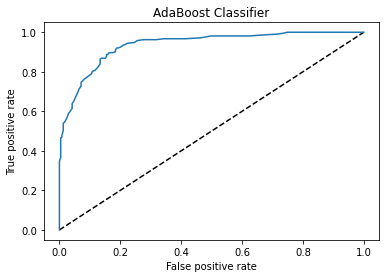

In [65]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [224]:
auc_score=roc_auc_score(ytest,abc.predict(xtest))
print(auc_score)

0.6962605326280829


### Saving the model

In [79]:
import joblib

joblib.dump(rfc,'rfc_insurance_claim_fraud_detection_model.obj')

['rfc_insurance_claim_fraud_detection_model.obj']